# Analyse de l'influence des distributions des temps inter-véhiculaires sur un axe routier

Paramètres de simulation:
- 1 voie
- longueur de la voie : 1900 m
- présence d'outils de contrôle de la circulation : non
- paramètres de distribution 
    <br/> dn -> N(8.33, 1) [m]
    <br/> longueur -> N(7, 1) [m]
    <br/> vitesse -> N(14, 3) [m.s^-1]
    <br/> t -> N(2, 0.5) [s]
- durée de la simulation : 500 s = 5000 1/10s   

import des librairies:

In [31]:
import numpy as np  
import network, simulation, toolkit
import makesimulation 
import matplotlib.pyplot as plt
import analysis
import statistics
import seaborn
from trafficintelligence import events, moving
import matplotlib.patches as mpatches

Récupération des fichiers initiaux

In [2]:
world = network.World.load('simple-net.yml')  
sim = simulation.Simulation.load('config.yml')


- headways -> Exp(1.8, 1)
</br> On décalle la distribution à 1s % les temps inter-véhiculaires produits ne seront pas inférieurs à cette valeur

In [3]:
import numpy as np  
import network, simulation, toolkit
import makesimulation 
import matplotlib.pyplot as plt
import analysis
import statistics
import seaborn
from trafficintelligence import events, moving

world = network.World.load('simple-net.yml')  
sim = simulation.Simulation.load('config.yml')

seeds = [52,33, 0,110,2,45]
headways = [1.5, 1.8, 2,2.4, 3]
interactions = {}
usersCount = {}
for seed in seeds : 
    usersCount[seed] = {}
    interactions[seed] = {}
    for h in headways:
    
        interactions[seed][h] = []
        world = network.World.load('simple-net.yml')  
        sim.seed = seed
        world.userInputs[0].distributions['headway'].scale = h-world.userInputs[0].distributions['headway'].loc
        
        world = makesimulation.run(world, sim)
        usersCount[seed][h] = world.getNotNoneVehiclesInWorld()
        for k in range(len(world.userInputs[0].alignment.users)-1):
            roadUser1 = world.userInputs[0].alignment.users[k]
            roadUser2 = world.userInputs[0].alignment.users[k+1]
            if roadUser1.timeInterval is not None and roadUser2.timeInterval is not None:
                i = events.Interaction(useCurvilinear=True, roadUser1=roadUser1, roadUser2=roadUser2)
                i.computeIndicators(world=world, alignment1=world.travelledAlignments(roadUser1), alignment2=world.travelledAlignments(roadUser2)) 
                interactions[seed][h].append(i)
toolkit.callWhenDone()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/trafficintelligence/events.py:238: RuntimeWarning: invalid value encountered in arccos
  collisionCourseDotProducts[instant] / (distances[instant] * speedDifferentials[instant]))


# 1-1) - distance d'interaction minimale

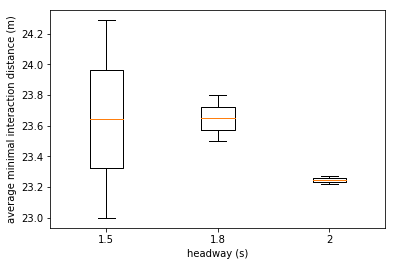

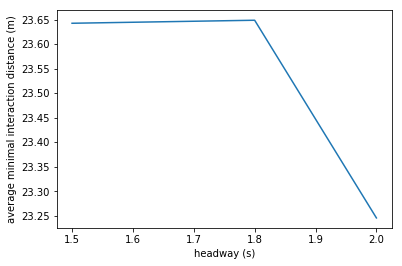

In [158]:
minDistanceList = {} # liste des distances minimales pour chaque simulation, pour chaque headway testé
minDistances = []
for h in headways:
    minDistanceList[h] = []
    for seed in seeds:
        for inter in interactions[seed][h]:
            minDistances.append(min(inter.indicators['Distance'].values.values()))
        minDistanceList[h].append(np.mean(minDistances))
        
data = [minDistanceList[x] for x in minDistanceList]

# boxplot 
plt.figure()
plt.boxplot(data, vert=True, labels=headways) 
plt.xlabel('headway (s)')
plt.ylabel('average minimal interaction distance (m)')
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/boxplot/distance_interactions_min/distance_interactions_min.png')   
plt.figure()
# courbe des moyennes
toDraw = []
for val in data:
    toDraw.append(np.mean(val))
plt.plot(headways, toDraw)
plt.xlabel('headway (s)')
plt.ylabel('average minimal interaction distance (m)')
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/distance_interactions_min/distance_interactions_min.png')   


##### OK ####

# 1-2) Distance d'interaction moyenne

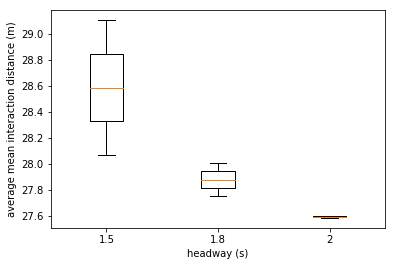

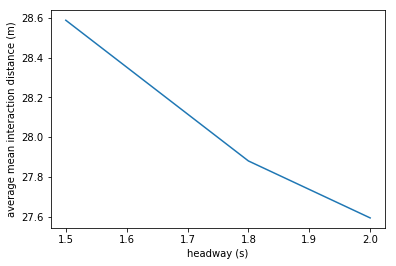

In [160]:
minDistanceList = {} # liste des distances minimales pour chaque simulation, pour chaque headway testé
minDistances = []
import statistics
for h in headways:
    minDistanceList[h] = []
    for seed in seeds:
        for inter in interactions[seed][h]:
            minDistances.append(statistics.mean(inter.indicators['Distance'].values.values()))
        minDistanceList[h].append(np.mean(minDistances))
        
data = [minDistanceList[x] for x in minDistanceList]
plt.figure()


# boxplot 
plt.boxplot(data, vert=True, labels=headways) 
plt.xlabel('headway (s)')
plt.ylabel('average mean interaction distance (m)')
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/boxplot/distance_interactions_mean/distance_interactions_mean.png')   

plt.figure()
# courbe des moyennes
toDraw = []
for val in data:
    toDraw.append(np.mean(val))
plt.plot(headways, toDraw)
plt.xlabel('headway (s)')
plt.ylabel('average mean interaction distance (m)')
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/distance_interactions_mean/distance_interactions_mean.png')
     
##### OK ####

# 1-3) Distance d'interaction maximale

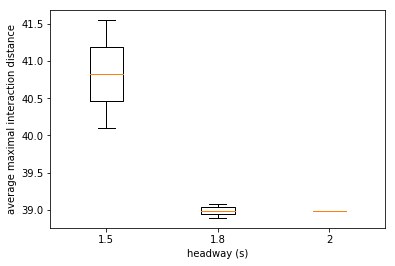

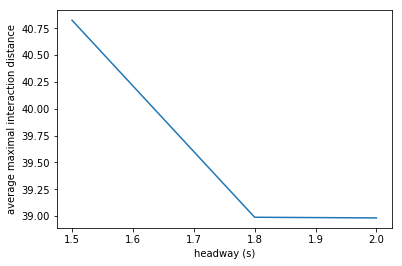

In [162]:
minDistanceList = {} # liste des distances minimales pour chaque simulation, pour chaque headway testé
minDistances = []
for h in headways:
    minDistanceList[h] = []
    for seed in seeds:
        for inter in interactions[seed][h]:
            minDistances.append(max(inter.indicators['Distance'].values.values()))
        minDistanceList[h].append(np.mean(minDistances))
        
data = [minDistanceList[x] for x in minDistanceList]

plt.figure()
# boxplot 
plt.boxplot(data, vert=True, labels=headways) 
plt.xlabel('headway (s)')
plt.ylabel('average maximal interaction distance (m)')
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/boxplot/distance_interactions_max/distance_interactions_max.png')


plt.figure()
# courbe des moyennes
toDraw = []
for val in data:
    toDraw.append(np.mean(val))
plt.plot(headways, toDraw)
plt.xlabel('headway (s)')
plt.ylabel('average maximal interaction distance (m)')
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/distance_interactions_max/distance_interactions_max.png')


     
##### OK ####

# 2 -  durée des interactions selon la distance seuil fixée

- par distance

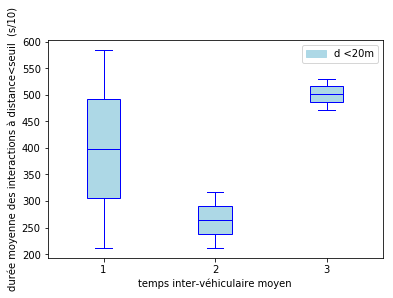

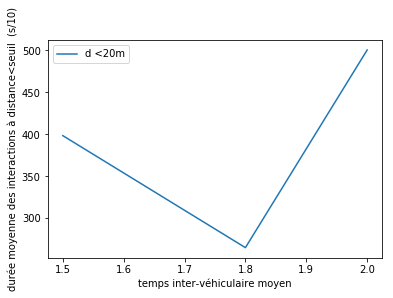

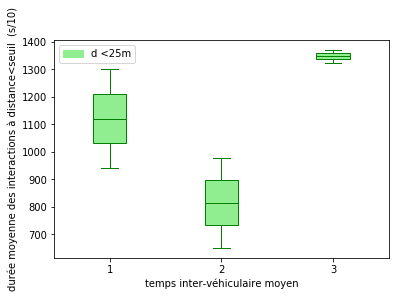

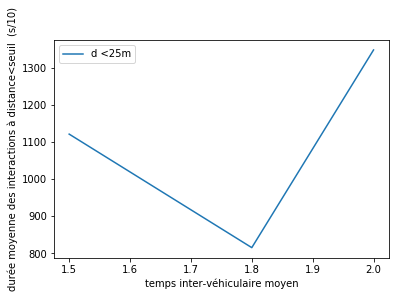

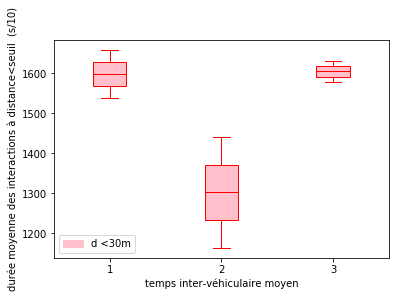

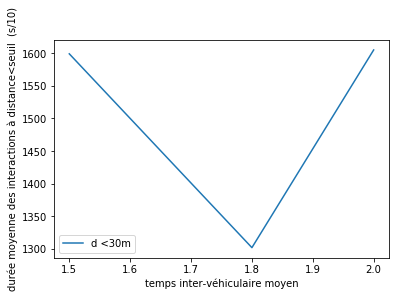

In [175]:
distances = [20, 25, 30]
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# fig.num=0


duration = {} # liste des durees d'interactions pour chaque simulation, pour chaque headway testé
colors = ['lightblue', 'lightgreen', 'pink']
edgesColor = ['blue', 'green', 'red']
for edgeCol, col, distance in zip(edgesColor, colors, distances):    
    for h in headways:
        interactionDuration = []
        duration[h] = []
        for seed in seeds: 
            for inter in interactions[seed][h]:
                interactionDummies = []
                for t in list(inter.timeInterval):
                    if inter.indicators['Distance'].values[t] <= distance:#min(inter.indicators['Distance'].values.values()):
                        interactionDummies.append(1)
                    else:
                        interactionDummies.append(0)
                interactionDuration.append(sum(toolkit.makeSubListFromList(interactionDummies, 1)))
            duration[h].append(np.mean(interactionDuration))
    data = [duration[x] for x in duration]
    
    toolkit.drawBoxPlot(data, edgeCol, col)
    patch = mpatches.Patch(color=col, label='d <' + str(distance)+'m')
    plt.legend(handles=[patch], loc='best')
    plt.ylabel('durée moyenne des interactions à distance<seuil  (s/10)')
    plt.xlabel('temps inter-véhiculaire moyen (s)')
    plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/boxplot/duree_interactions/'+str(distance))


    toPlot = []
    plt.figure()
    for val in data:
        toPlot.append(np.mean(val))
    plt.plot(headways, toPlot)
    plt.legend(['d <'+str(distance)+'m'])
    plt.ylabel('durée moyenne des interactions à distance<seuil  (s/10)')
    plt.xlabel('temps inter-véhiculaire moyen (s)')
    plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/duree_interactions/'+str(distance))





# plt.savefig('/home/lionel/projetmaitrise/outputData/average_duration_of_interactions.png')


- comparaison 

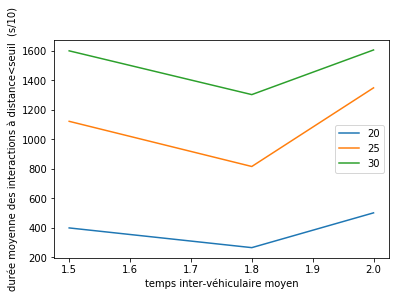

In [178]:
distances = [20, 25, 30]

duration = {} # liste des durees d'interactions pour chaque simulation, pour chaque headway testé
colors = ['lightblue', 'lightgreen', 'pink']
edgesColor = ['blue', 'green', 'red']
for edgeCol, col, distance in zip(edgesColor, colors, distances):    
    for h in headways:
        interactionDuration = []
        duration[h] = []
        for seed in seeds: 
            for inter in interactions[seed][h]:
                interactionDummies = []
                for t in list(inter.timeInterval):
                    if inter.indicators['Distance'].values[t] <= distance:#min(inter.indicators['Distance'].values.values()):
                        interactionDummies.append(1)
                    else:
                        interactionDummies.append(0)
                interactionDuration.append(sum(toolkit.makeSubListFromList(interactionDummies, 1)))
            duration[h].append(np.mean(interactionDuration))
    data = [duration[x] for x in duration]
    
    toPlot = []
    for val in data:
        toPlot.append(np.mean(val))
    plt.plot(headways, toPlot)
    plt.legend(distances)
    plt.ylabel('durée moyenne des interactions à distance<seuil  (s/10)')
    plt.xlabel('temps inter-véhiculaire moyen (s)')

plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/duree_interactions/comparaison')



# plt.savefig('/home/lionel/projetmaitrise/outputData/average_duration_of_interactions.png')



# 3 - duree d'interaction / durée de poursuite selon la distance seuil fixée

- par distance seuil

[0.14478136692113133, 0.3029957834655856]
[0.18887959693619535, 0.22806672907991365]
[0.3568909955222734, 0.3089116794588615]
[0.5596707992596999, 0.6972845280065385]
[0.4952499174777745, 0.6049964430004914]
[0.7608406615418798, 0.7323786337286025]
[0.8957936864603406, 0.8947577791161339]
[0.7713600537323527, 0.8479504391565144]
[0.857168320312359, 0.8844163241486324]


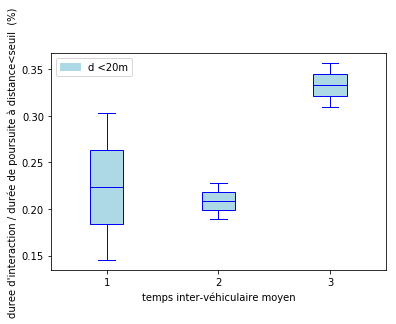

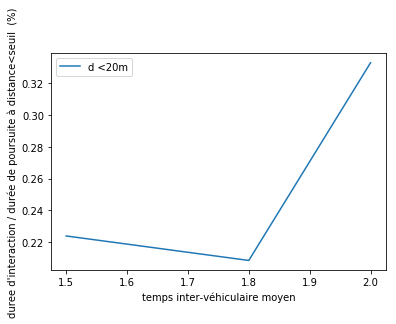

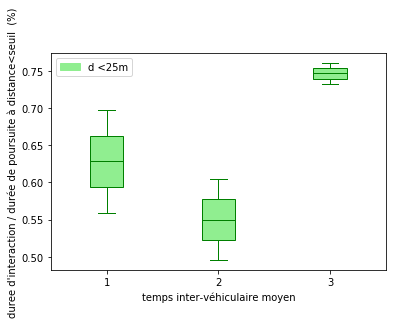

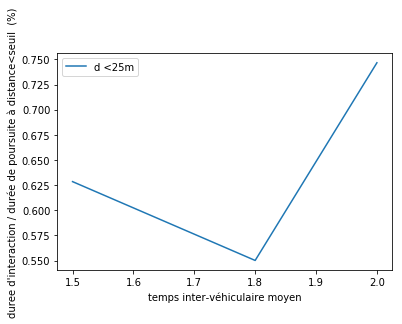

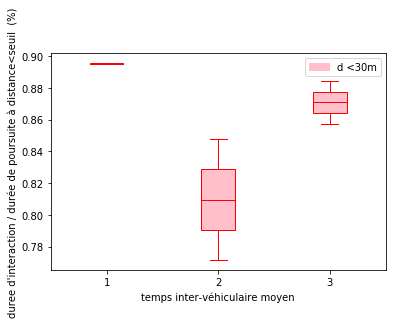

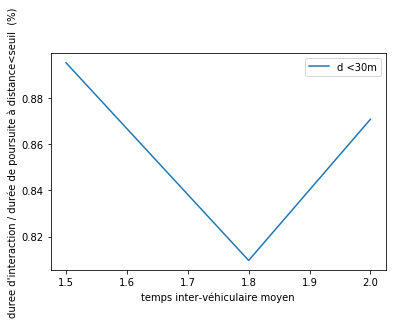

In [180]:
distances = [20, 25, 30]
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# fig.num=0

colors = ['lightblue', 'lightgreen', 'pink']
edgesColor = ['blue', 'green', 'red']

proportion = {} # liste des proportions de temps ou deux vehicules sont tels que d=dmin, pour chaque simulation, pour chaque headway testé

for edgeCol, col, distance in zip(edgesColor, colors, distances):    
    for h in headways:
        interactionDuration = []
        proportion[h] = []
        for seed in seeds: 
            for inter in interactions[seed][h]:
                interactionDummies = []
                for t in list(inter.timeInterval):
                    if inter.indicators['Distance'].values[t] <= distance:# min(inter.indicators['Distance'].values.values()):
                        interactionDummies.append(1)
                    else:
                        interactionDummies.append(0)
                interactionDuration.append(sum(toolkit.makeSubListFromList(interactionDummies, 1))/len(list(inter.timeInterval)))
            proportion[h].append(np.mean(interactionDuration))
    data = [proportion[x] for x in proportion] 
    
    toolkit.drawBoxPlot(data, edgeCol, col)
    patch = mpatches.Patch(color=col, label='d <' + str(distance)+'m')
    plt.legend(handles=[patch], loc='best')
    plt.ylabel("duree d'interaction / durée de poursuite à distance<seuil  (%)")
    plt.xlabel('temps inter-véhiculaire moyen (s)')    
    plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/boxplot/duree_interaction_rapport/'+str(distance))


    toPlot = []
    plt.figure()
    for val in data:
        toPlot.append(np.mean(val))
    plt.plot(headways, toPlot)
    plt.legend(['d <'+str(distance)+'m'])
    plt.ylabel("duree d'interaction / durée de poursuite à distance<seuil  (%)")
    plt.xlabel('temps inter-véhiculaire moyen (s)')
    plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/duree_interaction_rapport/'+str(distance))

    # plt.savefig('/home/lionel/projetmaitrise/outputData/average_proportion_of_interaction_time_d=dmin.png')
# ### OK ###

- comparaison

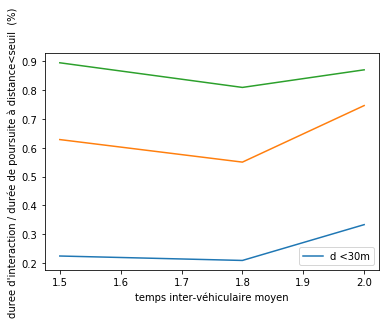

In [181]:
distances = [20, 25, 30]
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# fig.num=0

colors = ['lightblue', 'lightgreen', 'pink']
edgesColor = ['blue', 'green', 'red']

proportion = {} # liste des proportions de temps ou deux vehicules sont tels que d=dmin, pour chaque simulation, pour chaque headway testé

for edgeCol, col, distance in zip(edgesColor, colors, distances):    
    for h in headways:
        interactionDuration = []
        proportion[h] = []
        for seed in seeds: 
            for inter in interactions[seed][h]:
                interactionDummies = []
                for t in list(inter.timeInterval):
                    if inter.indicators['Distance'].values[t] <= distance:# min(inter.indicators['Distance'].values.values()):
                        interactionDummies.append(1)
                    else:
                        interactionDummies.append(0)
                interactionDuration.append(sum(toolkit.makeSubListFromList(interactionDummies, 1))/len(list(inter.timeInterval)))
            proportion[h].append(np.mean(interactionDuration))
            
    data = [proportion[x] for x in proportion] 
    toPlot = []
    for val in data:
        toPlot.append(np.mean(val))
    plt.plot(headways, toPlot)
    plt.legend(['d <'+str(distance)+'m'])
    plt.ylabel("duree d'interaction / durée de poursuite à distance<seuil  (%)")
    plt.xlabel('temps inter-véhiculaire moyen (s)')
    
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/duree_interaction_rapport/comparaison.png')



    ### ok ###

# 4) interactions / vehicule

- par distance

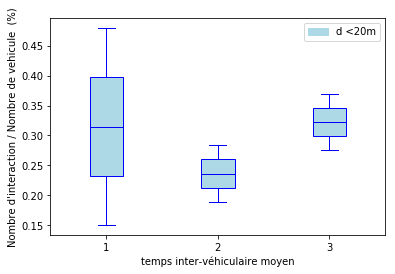

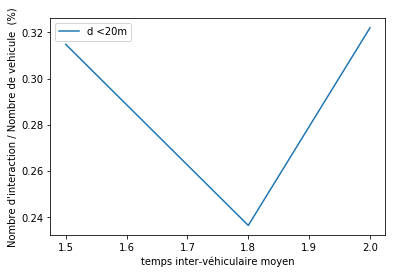

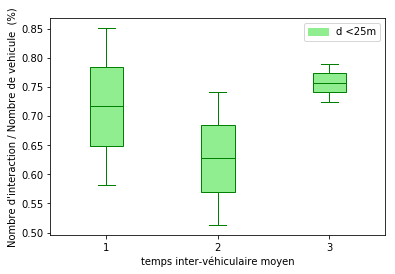

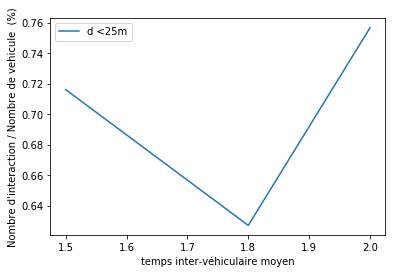

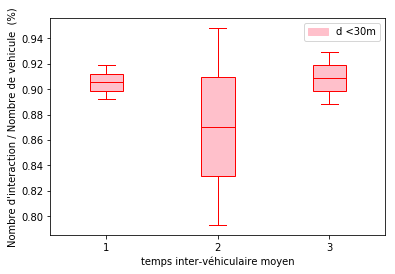

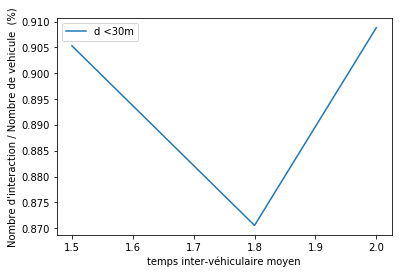

In [182]:
count = {} # liste des nombre inter/nombre vehicles quand d<seuil, pour chaque simulation, pour chaque headway testé
distances = [20,25,30]
for edgeCol, col, distance in zip(edgesColor, colors, distances):    
    for h in headways:
        count[h] = []
        for seed in seeds:
            _temp = []
            for inter in interactions[seed][h]:
                dummy = []
                for t in list(inter.timeInterval):
                    if inter.indicators['Distance'].values[t] <= distance:
                        dummy.append(1)
                    else:
                        dummy.append(0)
                c = toolkit.countElementInList(dummy, 1)
                _temp.append(c)
            count[h].append((sum(_temp)/ len(usersCount[seed][h][0])))
            
    data = [count[x] for x in count]  
    toolkit.drawBoxPlot(data, edgeCol, col)
    patch = mpatches.Patch(color=col, label='d <' + str(distance)+'m')
    plt.legend(handles=[patch], loc='best')
    plt.ylabel("Nombre d'interaction / Nombre de vehicule  (%)")
    plt.xlabel('temps inter-véhiculaire moyen (s)')   
    plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/boxplot/interaction_par_vehicule/'+str(distance))




    toPlot = []
    plt.figure()
    for val in data:
        toPlot.append(np.mean(val))
    plt.plot(headways, toPlot)
    plt.legend(['d <'+str(distance)+'m'])
    plt.ylabel("Nombre d'interaction / Nombre de vehicule  (%)")
    plt.xlabel('temps inter-véhiculaire moyen (s)')
    plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/interaction_par_vehicule/'+str(distance))



### ok ###

- comparaison

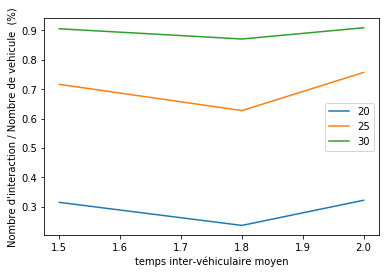

In [183]:
count = {} # liste des nombre inter/nombre vehicles quand d<seuil, pour chaque simulation, pour chaque headway testé
distances = [20,25,30]
for edgeCol, col, distance in zip(edgesColor, colors, distances):    
    for h in headways:
        count[h] = []
        for seed in seeds:
            _temp = []
            for inter in interactions[seed][h]:
                dummy = []
                for t in list(inter.timeInterval):
                    if inter.indicators['Distance'].values[t] <= distance:
                        dummy.append(1)
                    else:
                        dummy.append(0)
                c = toolkit.countElementInList(dummy, 1)
                _temp.append(c)
            count[h].append((sum(_temp)/ len(usersCount[seed][h][0])))
            
    data = [count[x] for x in count] 
    toPlot = []
    for val in data:
        toPlot.append(np.mean(val))
    plt.plot(headways, toPlot)
    plt.legend(distances)
    plt.ylabel("Nombre d'interaction / Nombre de vehicule  (%)")
    plt.xlabel('temps inter-véhiculaire moyen (s)')
    
plt.savefig('/home/lionel/projetmaitrise/outputData/ligne/courbe/interaction_par_vehicule/comparaison.png')



    
### ok ###

# Analyse de l'influence des distributions des temps inter-véhiculaires à une intersection

In [ ]:
import numpy as np  
import network, simulation, toolkit
import makesimulation 
import matplotlib.pyplot as plt
import analysis
import statistics
import seaborn
from trafficintelligence import events, moving

world = network.World.load('cross-net.yml')  
sim = simulation.Simulation.load('config.yml')

seeds = [52,33, 0,110,2,45]
headways = [1.5, 1.8, 2,2.4, 3]
interactions = {}
usersCount = {}
for seed in seeds : 
    usersCount[seed] = {}
    interactions[seed] = {}
    for h in headways:
    
        interactions[seed][h] = []
        world = network.World.load('simple-net.yml')  
        sim.seed = seed
        world.userInputs[1].distributions['headway'].scale = h-world.userInputs[0].distributions['headway'].loc
        
        world = makesimulation.run(world, sim)
        usersCount[seed][h] = world.getNotNoneVehiclesInWorld()
        for k in range(len(world.userInputs[0].alignment.users)-1):
            roadUser1 = world.userInputs[0].alignment.users[k]
            roadUser2 = world.userInputs[0].alignment.users[k+1]
            if roadUser1.timeInterval is not None and roadUser2.timeInterval is not None:
                i = events.Interaction(useCurvilinear=True, roadUser1=roadUser1, roadUser2=roadUser2)
                i.computeIndicators(world=world, alignment1=world.travelledAlignments(roadUser1), alignment2=world.travelledAlignments(roadUser2)) 
                interactions[seed][h].append(i)
toolkit.callWhenDone()

# liste des seeds a tester
seeds = [k for k in range(0,10)]#,47,48,49,50]

for seed in seeds:
    sim.seed = seed

    # liste des headways a essayer:
    headways = [1.5]#, 1.9, 2.3]#, 2.2, 2.3, 2.5]#, 1.6, 1.8, 2, 2.2]#, 2.4, 2.6, 2.8]
    cList = []
    fig0 = plt.figure(num=0)
    cList = {}
    durationList = {}
    durationList2 = {}
    count = {}
    
    for h in headways:
        # modification des paramètres dans simple-net.yml
        world = network.World.load('simple-net.yml')  
        world.userInputs[0].distributions['headway'].scale = h-world.userInputs[0].distributions['headway'].loc

        # running the simulation
        world = makesimulation.run(world, sim)
        
        # distribution des distances minimales d'interaction
        interactions = []
        # 1ere etape : recuperer la liste des interactions entre chaque paire de vehicules
        for k in range(len(world.userInputs[0].alignment.users)-1):
            roadUser1 = world.userInputs[0].alignment.users[k]
            roadUser2 = world.userInputs[0].alignment.users[k+1]
            if roadUser1.timeInterval is not None and roadUser2.timeInterval is not None:
                i = events.Interaction(useCurvilinear=True, roadUser1=roadUser1, roadUser2=roadUser2)
                i.computeIndicators(world=world, alignment1=world.travelledAlignments(roadUser1), alignment2=world.travelledAlignments(roadUser2)) 
                interactions.append(i)
        
        # recupérer la valeur minimale des distances entre chaque paire de vehicule 
        minDistances = [min(i.indicators['Distance'].values.values()) for i in interactions]
        plt.figure(num=0)
        ax = seaborn.distplot(minDistances, rug=False, hist=True, label='h = '+str(h)+'seed = '+str(seed), norm_hist=True)
        # pour chaque tiv testé on obtient la distribution des distances minimales entre chaque paire de véhicules
        plt.xlabel("distance minimale entre chaque paire de véhicules")
        plt.ylabel("proportion")
        ax.legend()
               
        minDistances = [20]#,25,30]
        cList[h] = {}
        
        for distance in minDistances:
            duration = []
            # rapport durée interaction
            for i in interactions:
                interactionLength = []
                for t in list(i.timeInterval):
                    if i.indicators['Distance'].values[t] < distance:
                        interactionLength.append(1)
                    else:
                        interactionLength.append(0)
                interactionDuration = sum(toolkit.makeSubListFromList(interactionLength, 1))
    #             interactionDuration = interactionDuration / len(list(i.timeInterval))
                duration.append(interactionDuration)
            durationList[h] = list(filter(lambda v: v !=0, duration))
            plt.figure(num=distance)
            ax=seaborn.distplot(durationList[h], rug=False, hist=True, label='h = '+str(h)+', d<'+str(distance)+'seed = '+str(seed), norm_hist=False)
            plt.xlabel("distribution du temps d'interactions entre chaque paire de vehicule")
            plt.ylabel("proportion")
            ax.legend()
            
        
        durationList2[h] = []
        # #############################################################333
        for i in interactions:
            duration2 = []
            interactionLength2 = []

            for t in list(i.timeInterval):

                if i.indicators['Distance'].values[t] == min(i.indicators['Distance'].values.values()):
                    interactionLength2.append(1)
                else:
                    interactionLength2.append(0)
        #     print(interactionLength2)
            interactionDuration2 = sum(toolkit.makeSubListFromList(interactionLength2, 1))
            durationList2[h].append(interactionDuration2)

        plt.figure('distance min')
        plt.hist(durationList2[h], label='h = '+str(h)+'seed = '+str(seed), density=False, bins=[k for k in range(0,400,10)], alpha=.4)
        plt.xlabel("duree d'interaction quand d=dmin")
        plt.ylabel("proportion")
        plt.legend()
        
        count[h] = {}
        for distance in minDistances:
            count[h][distance] = 0
            for i in interactions:
                interactionLength = []
                for t in list(i.timeInterval):
                    if i.indicators['Distance'].values[t] < distance:
                        interactionLength.append(1)
                    else:
                        interactionLength.append(0)
                count[h][distance] += toolkit.countElementInList(interactionLength, 1)
            count[h][distance] /= len(world.getNotNoneVehiclesInWorld()[0])
                
    count = toolkit.inverseDict(count, headways, minDistances)
    plt.figure('compte')
    for el in count:
        plt.plot(list(count[el].keys()), list(count[el].values()), label='d < '+str(el)+'seed = '+str(seed))
        plt.legend()
        

# liste des seeds a tester
seeds = [k for k in range(0,15)]#,47,48,49,50]
aTracer15 = []
for seed in seeds:
    sim.seed = seed

    # liste des headways a essayer:
    headways = [1.5]#, 1.9]#, 2.3]#, 2.2, 2.3, 2.5]#, 1.6, 1.8, 2, 2.2]#, 2.4, 2.6, 2.8]
    cList = []
    fig0 = plt.figure(num=0)
    cList = {}
    durationList = {}
    durationList2 = {}
    count = {}
    
    for h in headways:
        # modification des paramètres dans simple-net.yml
        world = network.World.load('simple-net.yml')  
        world.userInputs[0].distributions['headway'].scale = h-world.userInputs[0].distributions['headway'].loc

        # running the simulation
        world = makesimulation.run(world, sim)
        
        # distribution des distances minimales d'interaction
        interactions = []
        # 1ere etape : recuperer la liste des interactions entre chaque paire de vehicules
        for k in range(len(world.userInputs[0].alignment.users)-1):
            roadUser1 = world.userInputs[0].alignment.users[k]
            roadUser2 = world.userInputs[0].alignment.users[k+1]
            if roadUser1.timeInterval is not None and roadUser2.timeInterval is not None:
                i = events.Interaction(useCurvilinear=True, roadUser1=roadUser1, roadUser2=roadUser2)
                i.computeIndicators(world=world, alignment1=world.travelledAlignments(roadUser1), alignment2=world.travelledAlignments(roadUser2)) 
                interactions.append(i)
        
        # recupérer la valeur minimale des distances entre chaque paire de vehicule 
        minDistances = [min(i.indicators['Distance'].values.values()) for i in interactions]
        aTracer15.append(np.mean(minDistances))
        plt.figure(num=0)
        ax = seaborn.distplot(minDistances, rug=False, hist=True, label='h = '+str(h)+'seed = '+str(seed), norm_hist=False)
        # pour chaque tiv testé on obtient la distribution des distances minimales entre chaque paire de véhicules
        plt.xlabel("distance minimale entre chaque paire de véhicules")
        plt.ylabel("proportion")
        ax.legend()
plt.figure('je sais pas')
seaborn.distplot(aTracer15, label='h = '+str(h))
plt.legend()

# np.average(data, axis=1,